# Crossmodal Capture Study Exploration & Figures

In this script, I want to get to know my data a little better. This will entail:
- plotting accuracy by condition
- plotting porportions of fixations to each of my eyetracking interest areas by condition
- plotting means of various metrics <br>
*note: since this is pilot data, I'm not yet running stats

In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import os

In [2]:
# change current working directory
os.chdir(os.path.dirname(os.path.abspath('/Users/sheaduarte/Desktop/School/PSC290python/final/AnalysisHelper.py')))

In [3]:
# import our analysis helper script and the classes we'll use
import AnalysisHelper as ah
from AnalysisHelper import EyeTrackingHelper
from AnalysisHelper import EasyDataframes

In [4]:
# import data
MSDall = pd.read_csv('/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/data/interim/MSDall.csv')
MSD = pd.read_csv('/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/data/processed/MSD.csv')

### Plot accuracy by condition

In [5]:
# define some things I'll use in my graphs
fig_output = '/Users/sheaduarte/Desktop/School/PSC290python/final/duarte/reports/figures/'
conditions_list = ['Hcong', 'HcongWN','HinCong', 'HinCongWN','Lcong', 'LcongWN','LinCong', 'LinCongWN']

In [6]:
# make our MSDall (all data, including incorrect trials) into a class object 
MSDall = ah.EasyDataframes(MSDall)

In [7]:
accuracy_df = MSDall.Accuracy_df('corrCheck', 'condition')
accuracy_df

,condition,accuracy
0,Hcong,0.983225
1,HcongWN,0.983364
2,HinCong,0.966759
3,HinCongWN,0.972119
4,Lcong,0.988722
5,LcongWN,0.977358
6,LinCong,0.977358
7,LinCongWN,0.977860


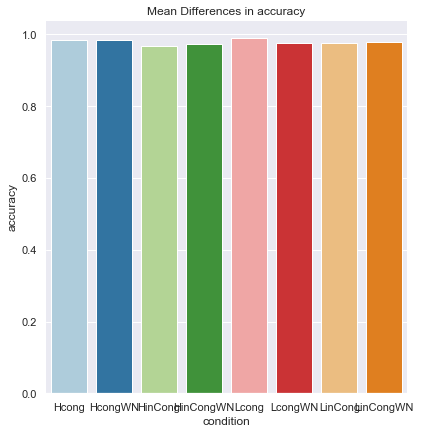

In [8]:
#  accuracy barplot using the df from above
accuracy_plot = ah.bar_graph(df = accuracy_df, x = 'condition', y='accuracy',z=None, 
                   output_directory = fig_output, 
                   custom_scheme = 'Paired', order=conditions_list)

### Plot proportions of first fixations made to each interest area by trial

In [9]:
# use EasyDataFrames class to make a df of proportions of fixations to each IA
MSDprops = ah.EasyDataframes(MSD) 
first_fix_props = MSDprops.FirstFixProportions_df()
first_fix_props

,condition,distractor,target
0,HcongWN,0.245747,0.754253
1,HinCongWN,0.374517,0.625483
2,LinCong,0.774704,0.225296
3,HinCong,0.395753,0.604247
4,LcongWN,0.618677,0.381323
5,Hcong,0.260994,0.739006
6,LinCongWN,0.760456,0.239544
7,Lcong,0.633588,0.366412


In [10]:
my_valList = ['distractor','target'] # define value list
my_idList = ['condition'] # define id variable

# plot proportions
prop_plot = ah.stacked_bar_graph(df = first_fix_props,id_vars_list = my_idList,value_vars_list=my_valList,
                   var_name_str = 'First Fixation Location', value_name_str='Proportion', x='condition', 
                   y = 'Proportion', z='First Fixation Location', output_directory=fig_output, custom_scheme = 'paired')
prop_plot

alt.Chart(...)

### Explore different outcome variabes

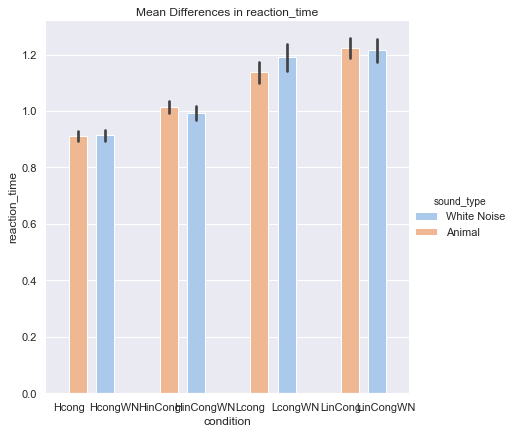

In [11]:
# overall reaction time

sns.set(style="darkgrid") #set style
rtG = ah.bar_graph(df = MSD, x = 'condition', y='reaction_time', z= 'sound_type', 
                   output_directory = fig_output, 
                   custom_scheme = 'pastel', order =conditions_list)

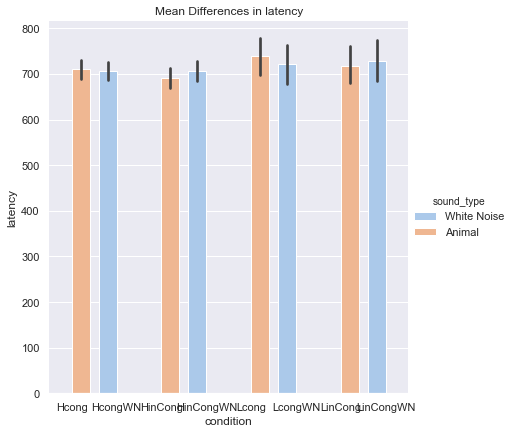

In [12]:
# overall latency

latencyG =  ah.bar_graph(df = MSD, x = 'condition', y='latency', z= 'sound_type', 
                         output_directory = fig_output, custom_scheme = 'pastel', order = conditions_list)

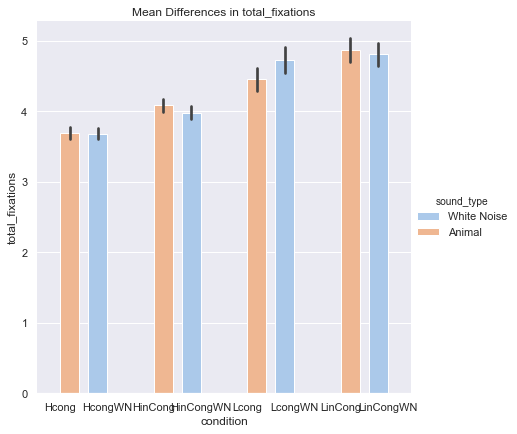

In [13]:
# overall total number of fixations

totalfixG = ah.bar_graph(df = MSD, x = 'condition', y='total_fixations', z= 'sound_type', 
                         output_directory = fig_output, custom_scheme = 'pastel', order = conditions_list)

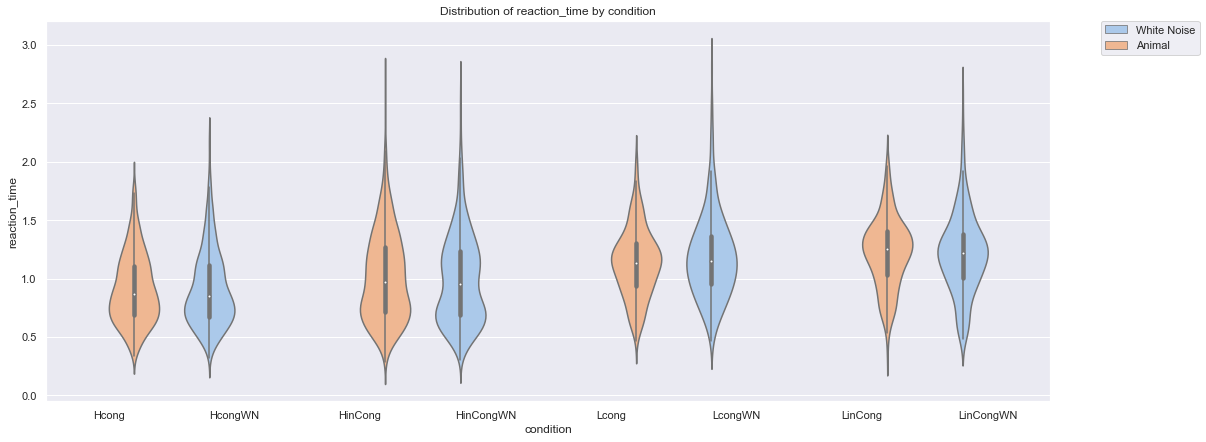

In [14]:
# distributions of overall reaction times

plt.rcParams['figure.figsize'] = (18, 7) #set params
rtViolin = ah.violin(df = MSD, x = 'condition', y= 'reaction_time', z = 'sound_type', 
                     custom_scheme = 'pastel', order = conditions_list)

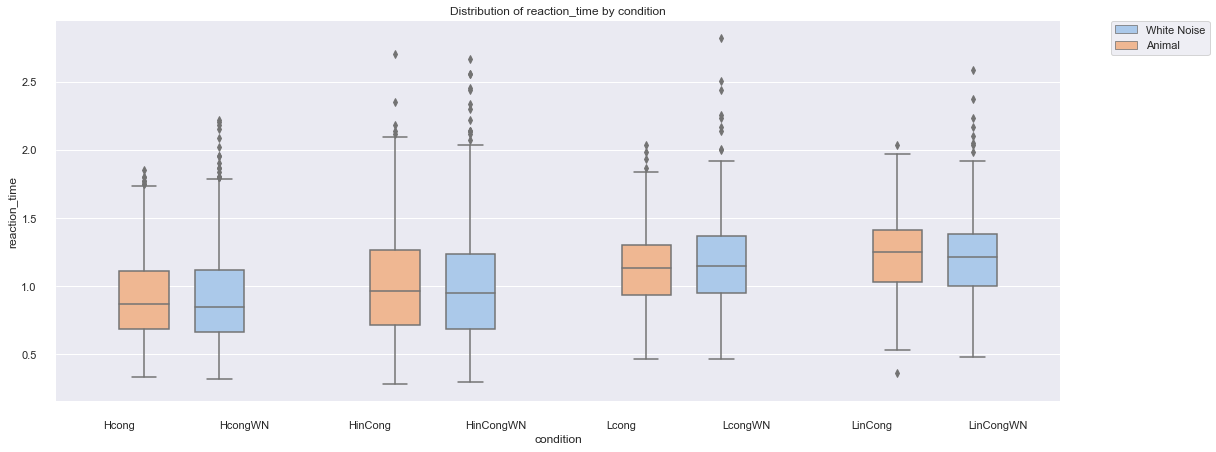

In [15]:
# different visualization of overall reaction time

rtBoxplot = ah.boxplot(df = MSD, x = 'condition', y= 'reaction_time', z = 'sound_type', 
                     custom_scheme = 'pastel', order = conditions_list)

### Visualize subsets of data

In [16]:
FFtargetGdata = MSD[MSD['first_fixation'] == 'targetIA'] #trials where the first fixation is on the target
FFdistGdata = MSD[MSD['first_fixation'] == 'distIA'] #trials where the first fixation is on the distractor 

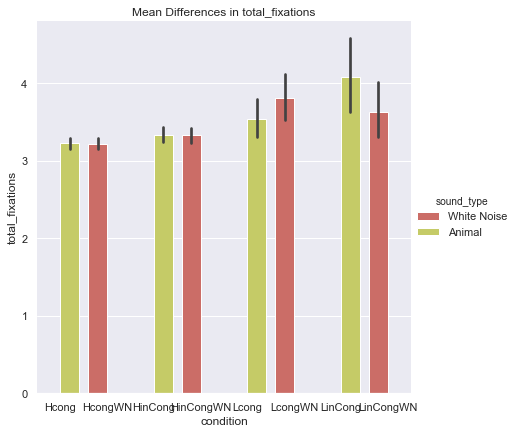

In [17]:
# total fixations by condition for trials where the first fixation is on the target
totalfixGT = ah.bar_graph(df = FFtargetGdata, x = 'condition', y='total_fixations', z= 'sound_type', 
                          custom_scheme = 'hls', order = conditions_list)

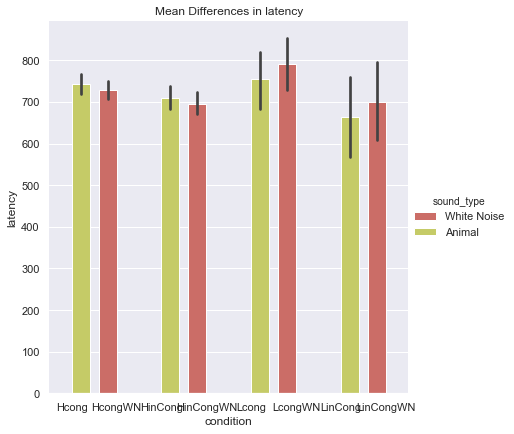

In [18]:
# latency by condition for trials where the first fixation is on the target
latencyGT = ah.bar_graph(df = FFtargetGdata, x = 'condition', y='latency', z= 'sound_type', 
                         custom_scheme = 'hls', order = conditions_list)

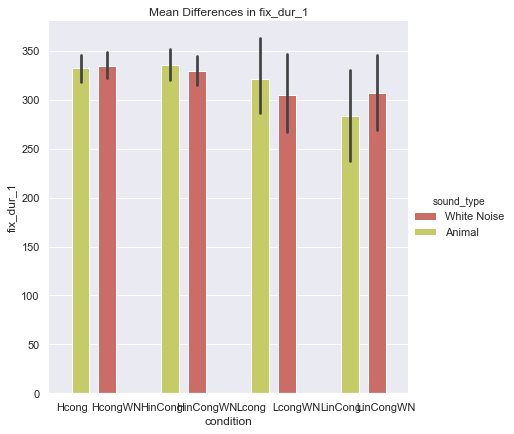

In [19]:
# dwell time on first fixation for trials where the first fixation is on the target
FFdwellT = ah.bar_graph(df = FFtargetGdata, x = 'condition', y='fix_dur_1', z= 'sound_type',
                        custom_scheme = 'hls', order = conditions_list)

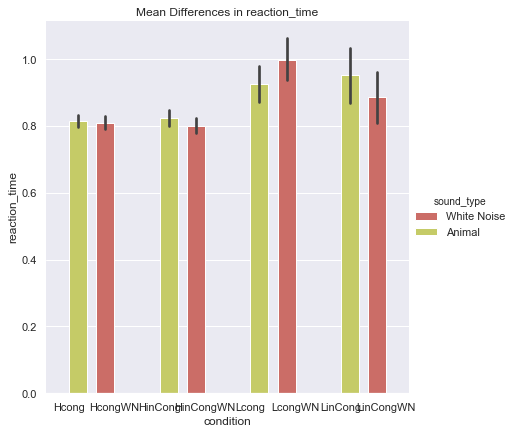

In [20]:
# reaction time for trials where the first fixation is on the target
rtGT = ah.bar_graph(df = FFtargetGdata, x = 'condition', y='reaction_time', z= 'sound_type',
                    custom_scheme = 'hls', order = conditions_list)

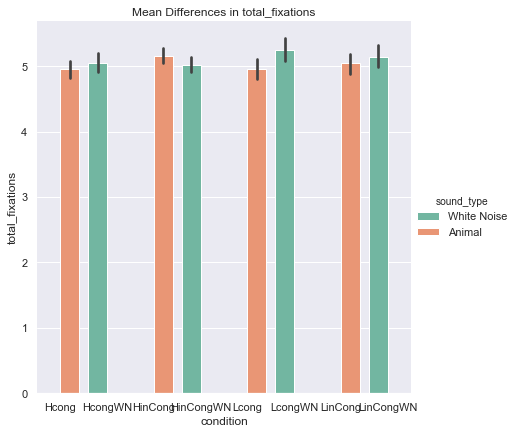

In [21]:
# total fixations by condition for trials where the first fixation is on the distractor
totalfixGD = ah.bar_graph(df = FFdistGdata, x = 'condition', y='total_fixations', 
                          z= 'sound_type', custom_scheme = 'Set2', order = conditions_list)

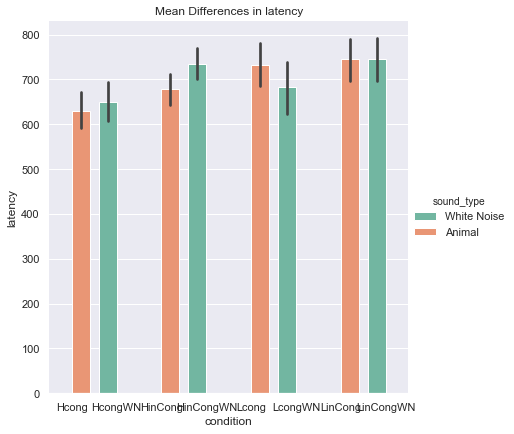

In [22]:
# latency by condition for trials where the first fixation is on the distractor
latencyGD = ah.bar_graph(df = FFdistGdata, x = 'condition', y='latency', 
                         z= 'sound_type', custom_scheme = 'Set2', order = conditions_list)

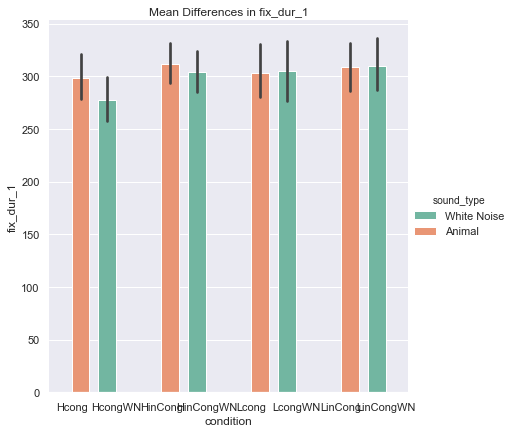

In [23]:
# dwell time on first fixation for trials where the first fixation is on the distractor
FFdwellD = ah.bar_graph(df = FFdistGdata, x = 'condition', y='fix_dur_1', 
                        z= 'sound_type', custom_scheme = 'Set2', order = conditions_list)

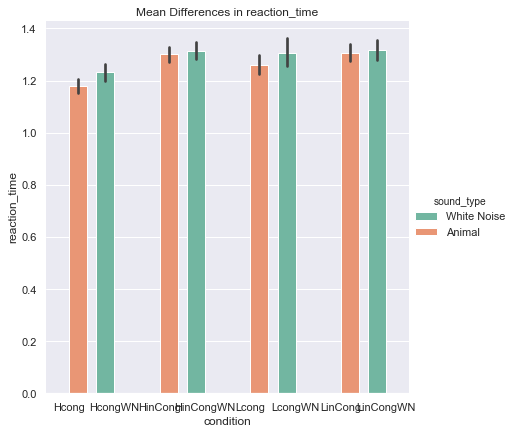

In [24]:
# reaction time for trials where the first fixation is on the distractor
rtGD = ah.bar_graph(df = FFdistGdata, x = 'condition', y='reaction_time', 
                    z= 'sound_type', custom_scheme = 'Set2', order = conditions_list)